<a href="https://colab.research.google.com/github/mJekal/pytorch_study/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression

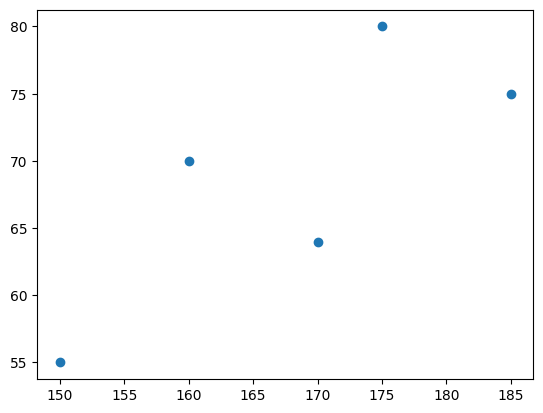

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
plt.plot(x,y,'o')

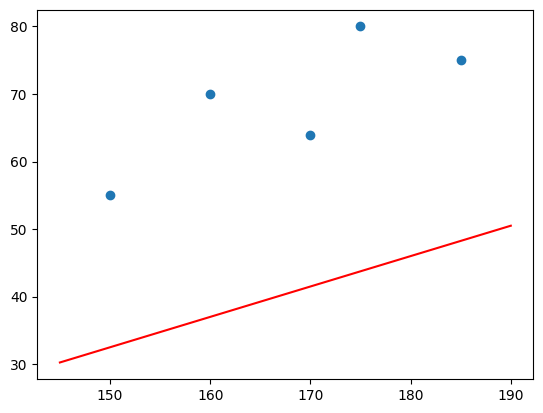

In [2]:
a = 0.45
b = -35
x_plot = np.linspace(145,190,100)
y_plot = a * x_plot + b

plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

optimal a = [0.56262626]
optimal b = [-25.75757576]


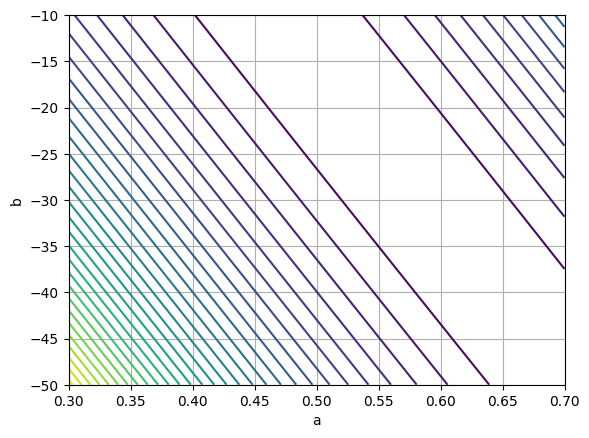

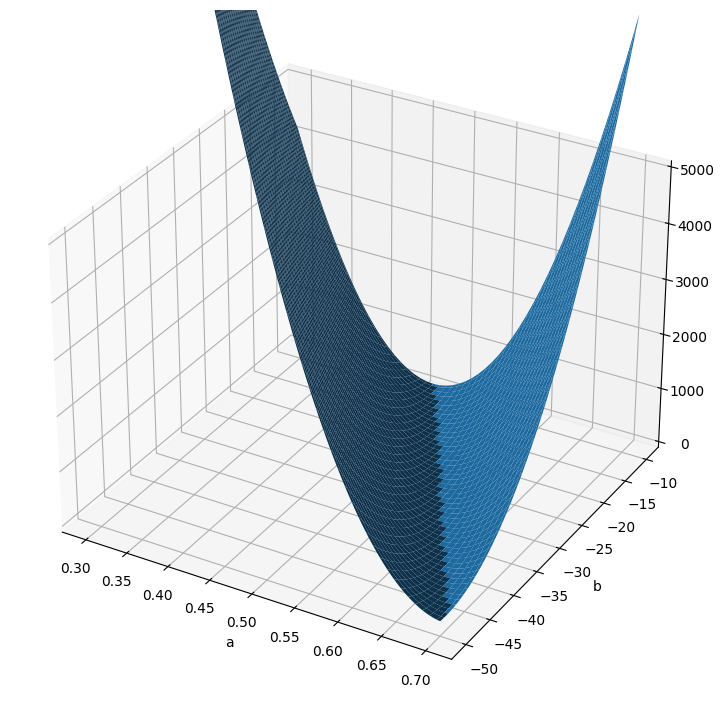

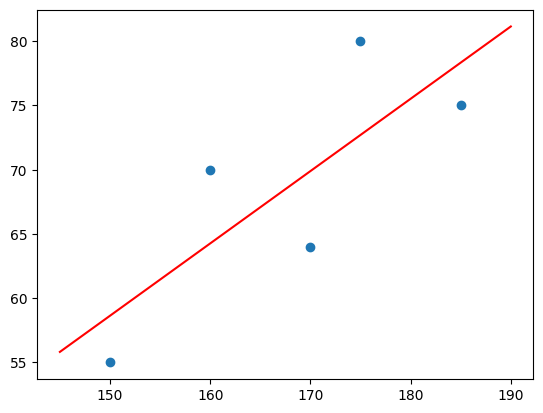

In [6]:
a = 0.5 + np.linspace(-0.2, 0.2, 100)
b = -30 + np.linspace(-20,20,100)

A, B = np.meshgrid(a,b)

L = np.zeros_like(A)
for xi, yi in zip(x,y):
  L += ((yi - (A*xi+B)))**2
plt.figure()
plt.contour(a,b,L,30)
plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.figure(figsize = [10,9])
ax = plt.axes(projection="3d")
ax.plot_surface(A,B,L)
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.set_zlim([0,5000])

a_opt = A[L==np.min(L)]
b_opt = B[L==np.min(L)]
print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

plt.figure()
x_plot = np.linspace(145,190,100)
y_plot = a_opt * x_plot + b_opt
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

In [7]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=a, y=b, z=L, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='Loss', width=700, height=600,
                  scene = dict( zaxis=dict(nticks=20, range=[0,5000]) ))

tensor(-47545.)
tensor(-282.)
tensor(0.4975) tensor(-34.9997)


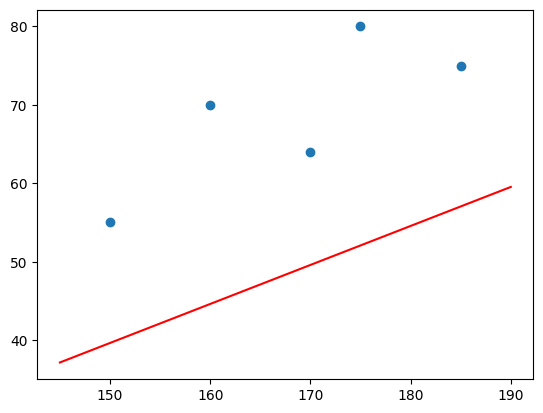

In [9]:
import torch
a = torch.tensor(0.45, requires_grad = True)
b = torch.tensor(-35.0, requires_grad = True)

L = 0
for i in range(5):
  L += (y[i] - (a*x[i]+b))**2

L.backward()
print(a.grad)
print(b.grad)

LR = 1e-6
a = a.detach()-LR*a.grad
b = b.detach()-LR*b.grad
print(a,b)

y_plot = a * x_plot + b
plt.plot(x,y,"o")
plt.plot(x_plot,y_plot,'r')

tensor(-17473.1660)
tensor(-103.9221)
tensor(0.5735) tensor(-34.9993)


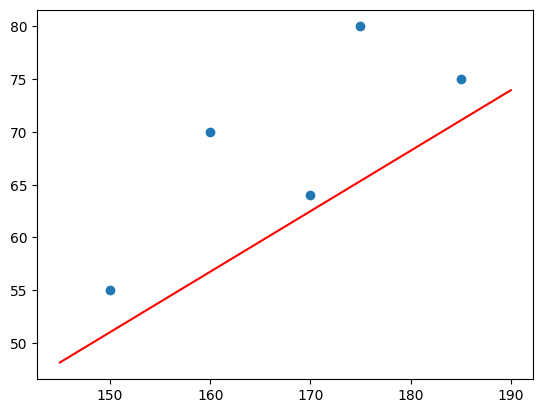

In [12]:
a.requires_grad = True
b.requires_grad = True

L = 0
for i in range(5):
  L += (y[i] - (a*x[i]+b))**2

L.backward()
print(a.grad)
print(b.grad)

LR = 1e-6
a = a.detach() - LR*a.grad
b=b.detach()-LR*b.grad
print(a,b)

x_plot=np.linspace(145,190,100)
y_plot=a * x_plot + b
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

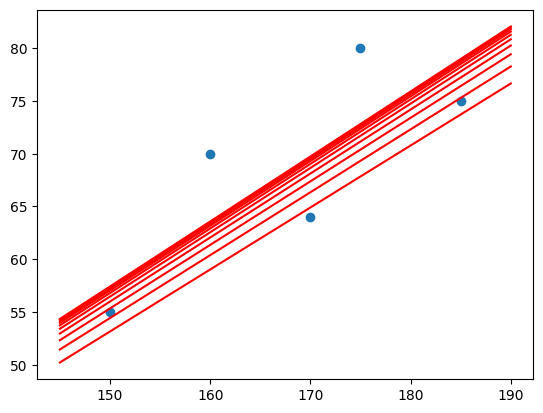

In [15]:
EPOCH = 10
LR = 1e-6
plt.plot(x,y,'o')
for _ in range(EPOCH):
  a.requires_grad = True
  b.requires_grad = True

  L = 0
  for i in range(5):
    L += (y[i] - (a*x[i]+b))**2

  L.backward()

  a = a.detach()-LR*a.grad
  b = b.detach()-LR*b.grad

  y_plot = a * x_plot + b
  plt.plot(x_plot,y_plot,'r')

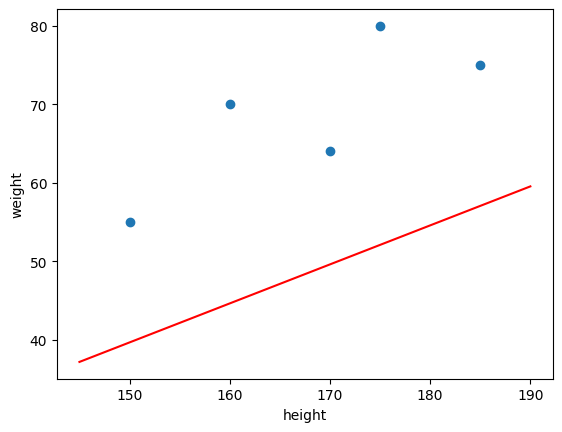

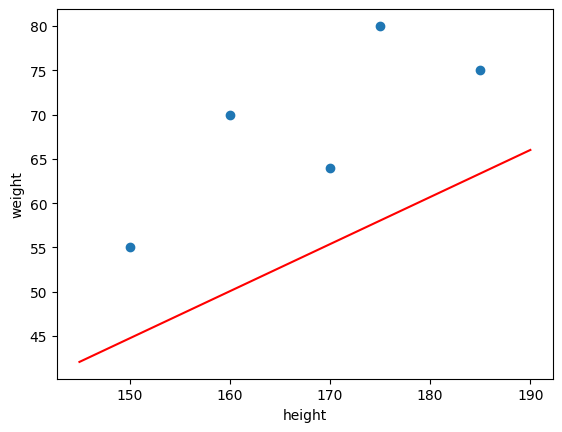

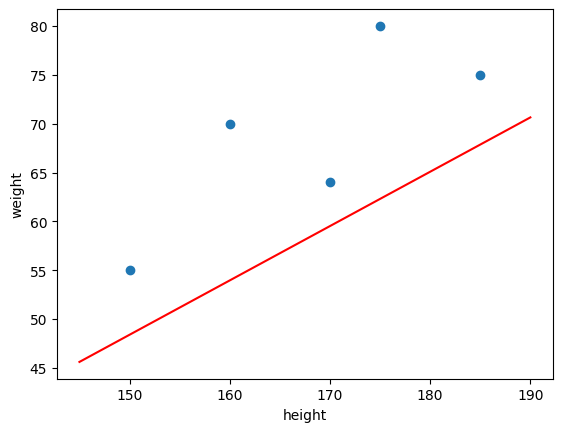

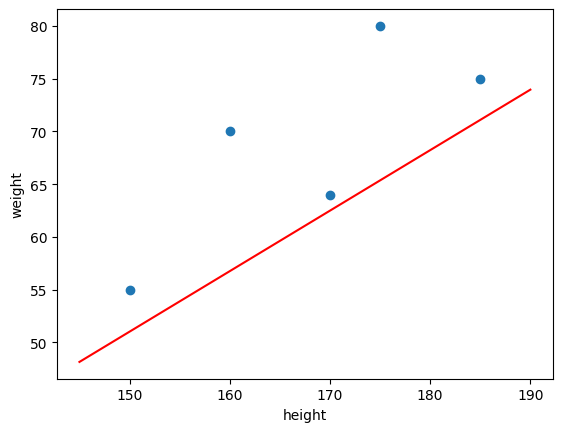

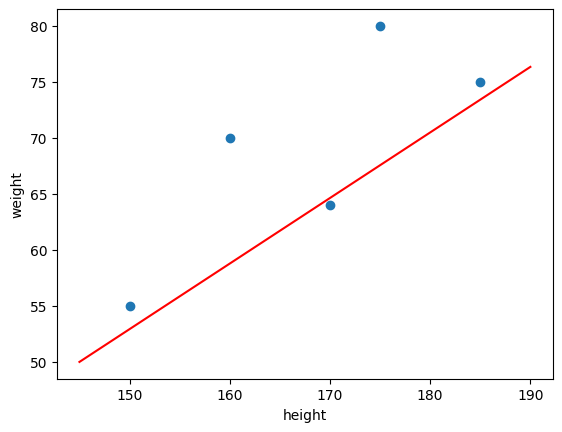

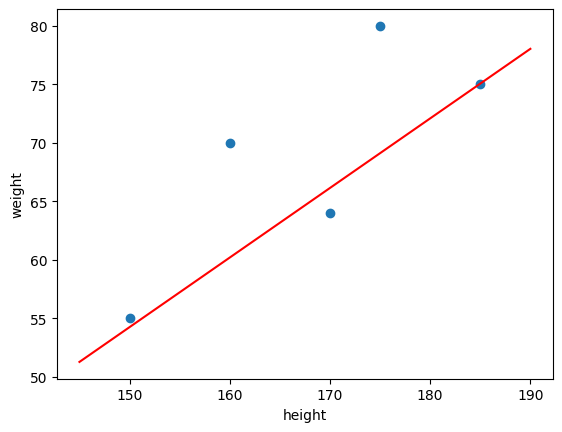

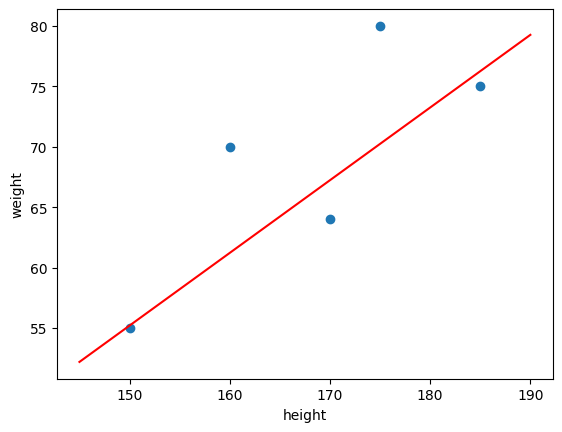

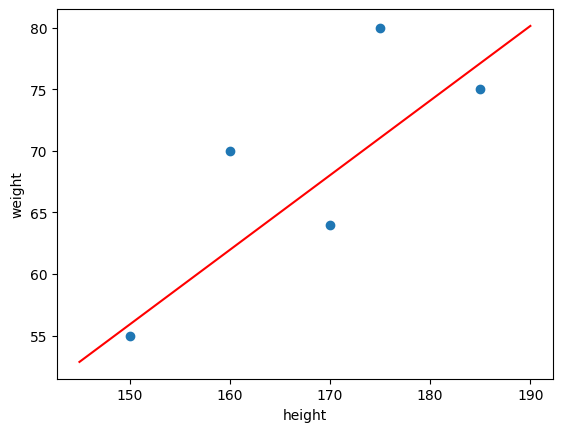

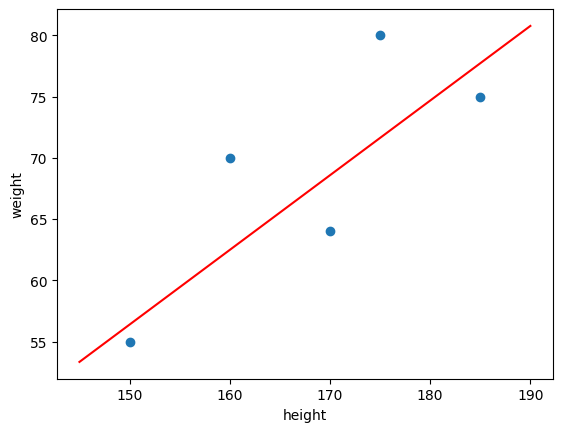

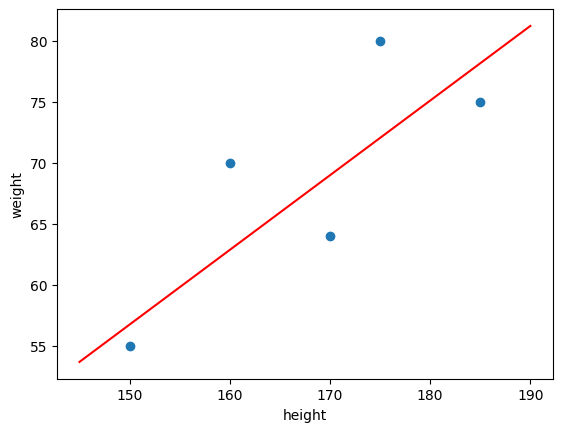

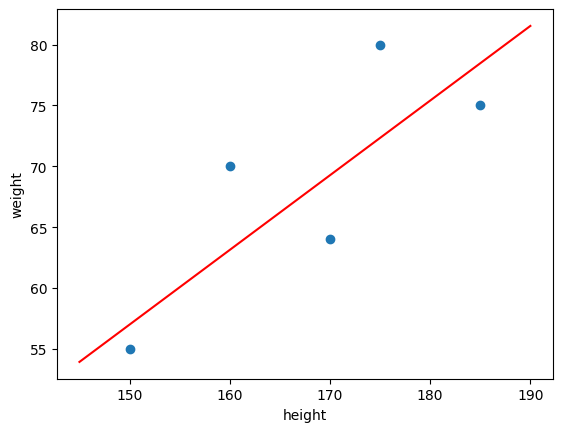

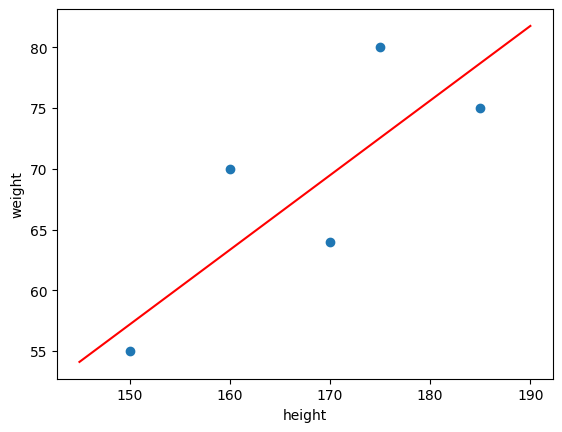

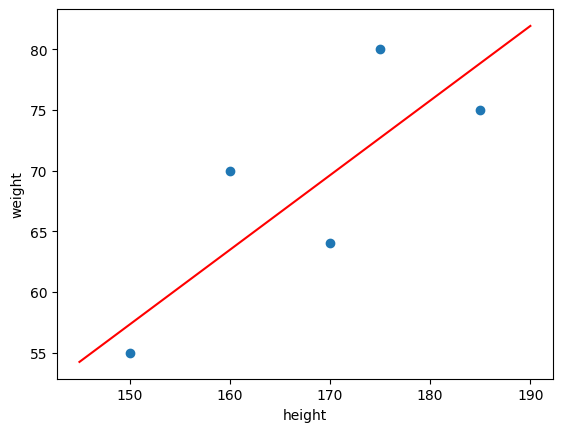

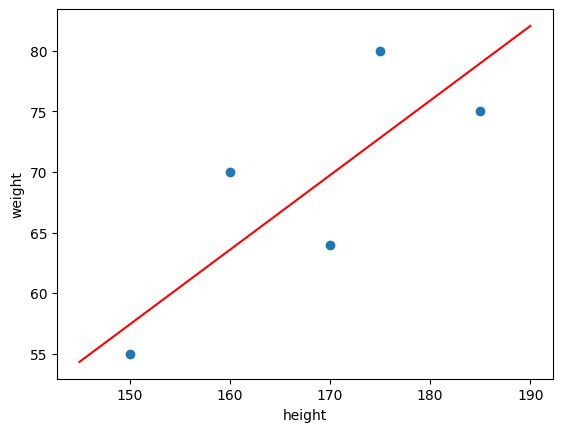

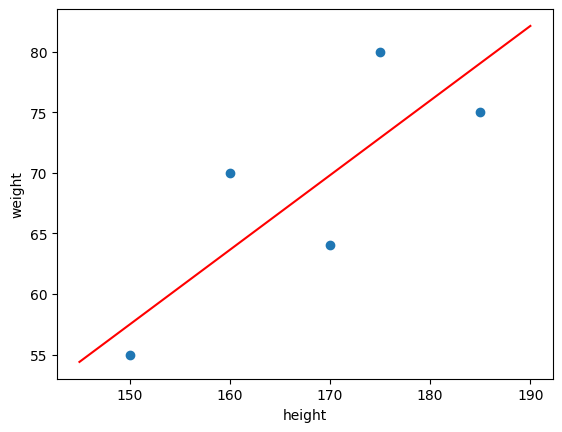

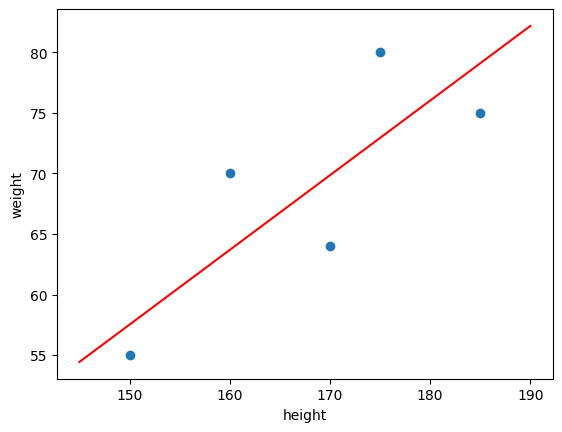

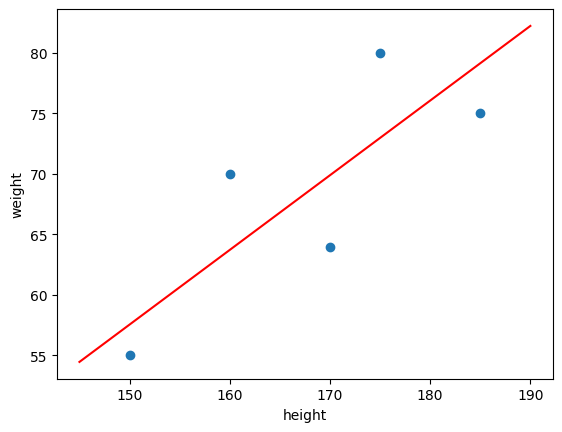

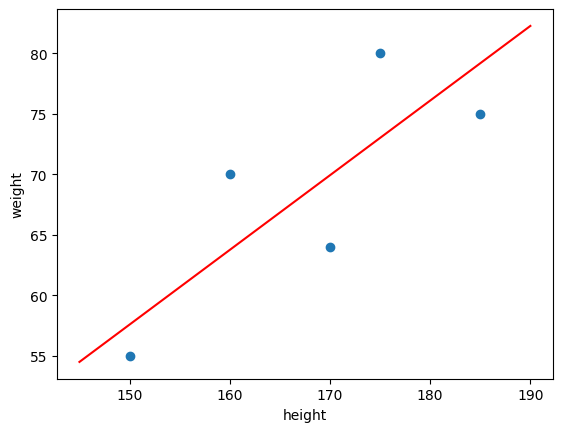

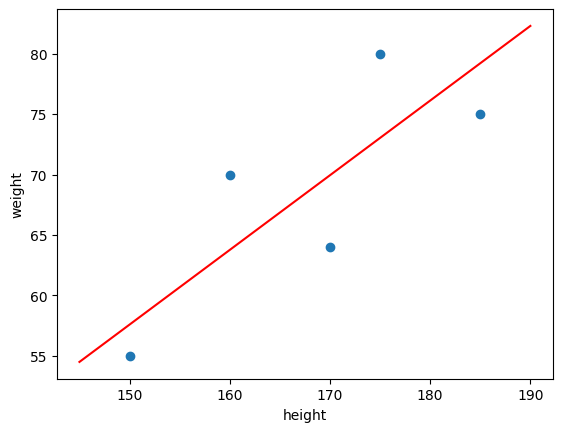

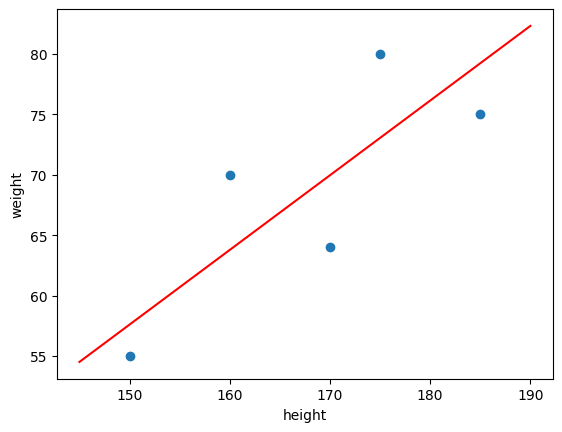

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH=20
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L=0
    for i in range(5):
        L += (y[i] - (a*x[i]+b))**2

    L.backward()

    a=a.detach()-LR*a.grad
    b=b.detach()-LR*b.grad

    y_plot=a * x_plot + b
    plt.figure()
    plt.plot(x,y,'o')
    plt.plot(x_plot,y_plot,'r')
    plt.xlabel("height")
    plt.ylabel("weight")

## GD

[0.44999998807907104, 0.4975450038909912, 0.5316010117530823, 0.555994987487793, 0.5734681487083435, 0.5859839916229248, 0.5949490070343018, 0.6013705134391785, 0.6059702038764954, 0.6092649102210999, 0.6116248369216919, 0.6133152842521667, 0.614526093006134, 0.6153934001922607, 0.6160146594047546, 0.6164596676826477, 0.6167783737182617, 0.6170066595077515, 0.6171702146530151, 0.6172873377799988, 0.6173712611198425]
[-35.0, -34.999717712402344, -34.999515533447266, -34.99937057495117, -34.999267578125, -34.99919128417969, -34.99913787841797, -34.99909973144531, -34.99907302856445, -34.999053955078125, -34.99903869628906, -34.999027252197266, -34.999019622802734, -34.99901580810547, -34.9990119934082, -34.99900817871094, -34.99900436401367, -34.99900436401367, -34.99900436401367, -34.99900436401367, -34.99900436401367]


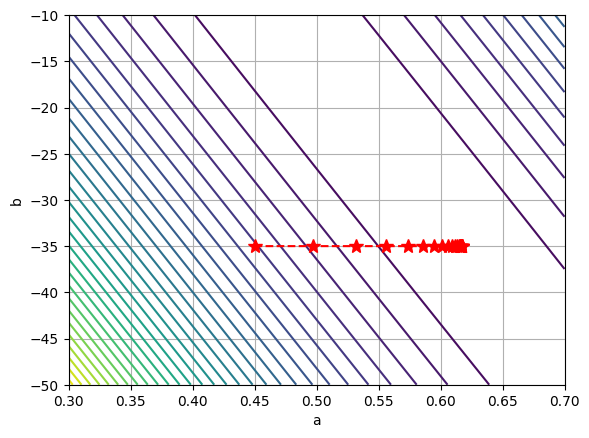

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH = 20
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)
a_hist=[a.detach().item()]
b_hist=[b.detach().item()]

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L=0
    for i in range(5):
        L += (y[i] - (a*x[i]+b))**2

    L.backward()

    a=a.detach()-LR*a.grad
    b=b.detach()-LR*b.grad

    a_hist += [a.item()]
    b_hist += [b.item()]

a = 0.5 + np.linspace(-0.2,0.2,100)
b = -30 + np.linspace(-20,20,100)
A, B = np.meshgrid(a,b)

L = np.zeros_like(A)
for i in range(5):
    L += (y[i]-(A*x[i]+B))**2

plt.figure()
plt.contour(a,b,L,30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.plot(a_hist,b_hist,"r*--",markersize=10)
print(a_hist)
print(b_hist)

## SGD

[0.44999998807907104, 0.45764997601509094, 0.4678182899951935, 0.4737664461135864, 0.4820370674133301, 0.4927622377872467, 0.5011327266693115, 0.5106882452964783, 0.5164315104484558, 0.5202416181564331, 0.5238305926322937, 0.5286742448806763, 0.5317767262458801, 0.5381495952606201, 0.5409327149391174, 0.5480504035949707, 0.550032913684845, 0.5565931797027588, 0.561695396900177, 0.5639470815658569, 0.565569281578064, 0.5671184659004211, 0.5689989328384399, 0.5743975043296814, 0.5785881280899048, 0.5788054466247559, 0.5790102481842041, 0.5800766944885254, 0.5847967267036438, 0.5854806303977966, 0.5891037583351135, 0.5895938277244568, 0.5930063724517822, 0.5923902988433838, 0.5925408601760864, 0.5964974164962769, 0.5995564460754395, 0.5985617637634277, 0.5986261963844299, 0.6022100448608398, 0.6016884446144104, 0.6016122102737427, 0.6011314988136292, 0.6045618653297424, 0.6072080135345459, 0.6057710647583008, 0.60500568151474, 0.6047801375389099, 0.6079870462417603, 0.6065050959587097, 0.

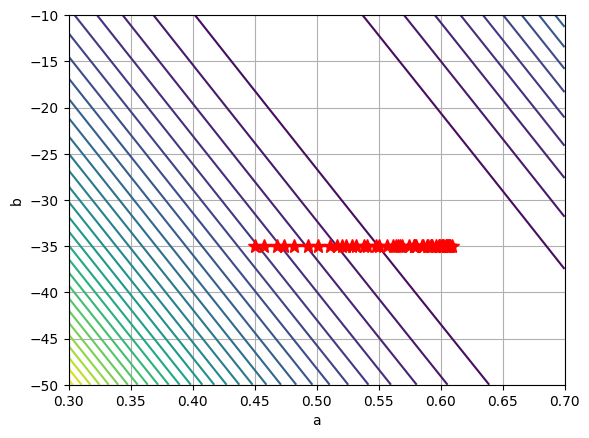

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

x = [150, 160, 170, 175, 185] # 키
y = [55, 70, 64, 80,75] # 몸무게
x_plot=np.linspace(145,190,100)

EPOCH = 10
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)
a_hist=[a.detach().item()]
b_hist=[b.detach().item()]

for _ in range(EPOCH):

    shuffle_idx=list(range(5))
    random.shuffle(shuffle_idx)
    for i in shuffle_idx:
        a.requires_grad=True
        b.requires_grad=True

        L = (y[i] - (a*x[i]+b) )**2
        L.backward()

        a=a.detach()-LR*a.grad
        b=b.detach()-LR*b.grad

        a_hist += [a.item()]
        b_hist += [b.item()]

a = 0.5 + np.linspace(-0.2,0.2,100)
b = -30 + np.linspace(-20,20,100)
A, B = np.meshgrid(a,b)

L = np.zeros_like(A)
for i in range(5):
    L += (y[i]-(A*x[i]+B))**2

plt.figure()
plt.contour(a,b,L,30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.plot(a_hist,b_hist,'r*--', markersize=10)
print(a_hist)
print(b_hist)